# Online Retail
 
### Project Goal: Purchase Behavior Prediction Using Machine Learning
### Dataset Source: [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/352/online+retail)


### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Data Overview

#### 2.1. Data Loading

In [3]:
df = pd.read_excel('Online Retail.xlsx')

#### 2.2. Basic Info

In [5]:
# Display first 5 rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
# Display last 5 rows
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [9]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [11]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 541909 rows and 8 columns.


In [13]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


### 3. Missing Value Analysis

In [15]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### 4. Data Cleaning

In [17]:
# Remove Missing Customer IDs
df = df.dropna(subset=['CustomerID'])

In [19]:
# Remove Cancelled Orders
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [21]:
# Check for Duplicates
df.duplicated().sum()
df = df.drop_duplicates()

In [23]:
# After Cleaning, New Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [25]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### 5. Outlier Detection

##### 5.1 Boxplot for Outlier Detection

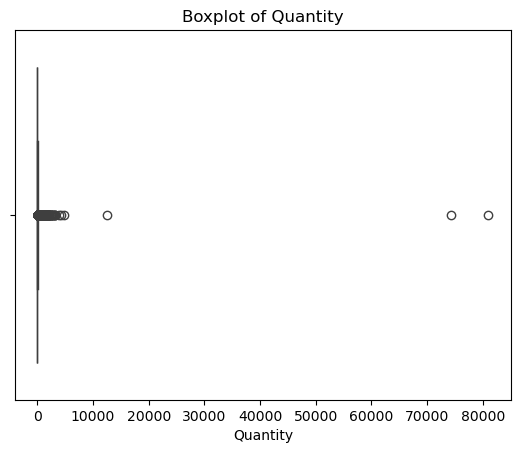

In [27]:
sns.boxplot(x=df['Quantity'])
plt.title("Boxplot of Quantity")
plt.show()

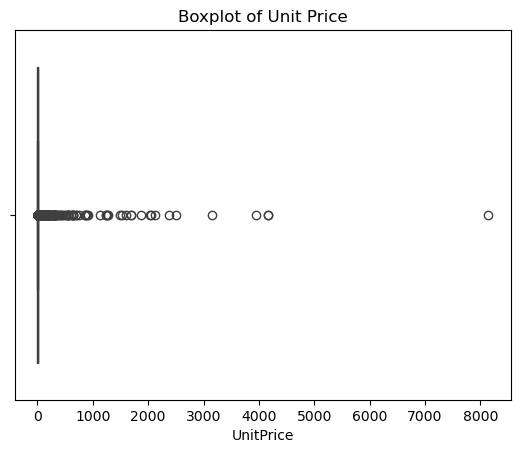

In [29]:
sns.boxplot(x=df['UnitPrice'])
plt.title("Boxplot of Unit Price")
plt.show()

#### 5.2 Remove Outliers Using IQR

In [31]:
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]

### 6. Distribution Check

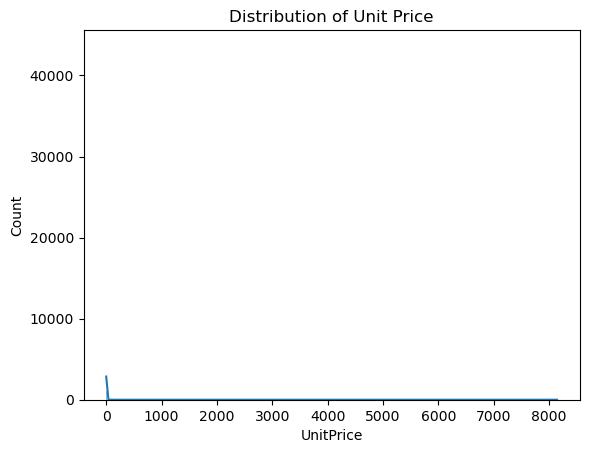

In [33]:
sns.histplot(df['UnitPrice'], kde=True)
plt.title("Distribution of Unit Price")
plt.show()

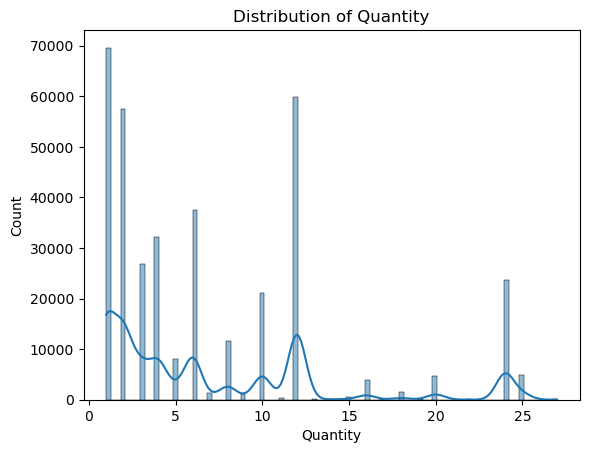

In [35]:
sns.histplot(df['Quantity'], kde=True)
plt.title("Distribution of Quantity")
plt.show()

### 7. Feature Engineering

In [37]:
# Add TotalPrice Column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [39]:
# Convert InvoiceDate to Datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [41]:
# Handle Negative or Zero Quantity and UnitPrice
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [60]:
# Add a new column: 'Purchase' - 1 if Quantity > 0, else 0
df['Purchase'] = df['Quantity'].apply(lambda x: 1 if x > 0 else 0)

### 8. Data Visualization

#### 8.1. Top Products Sold

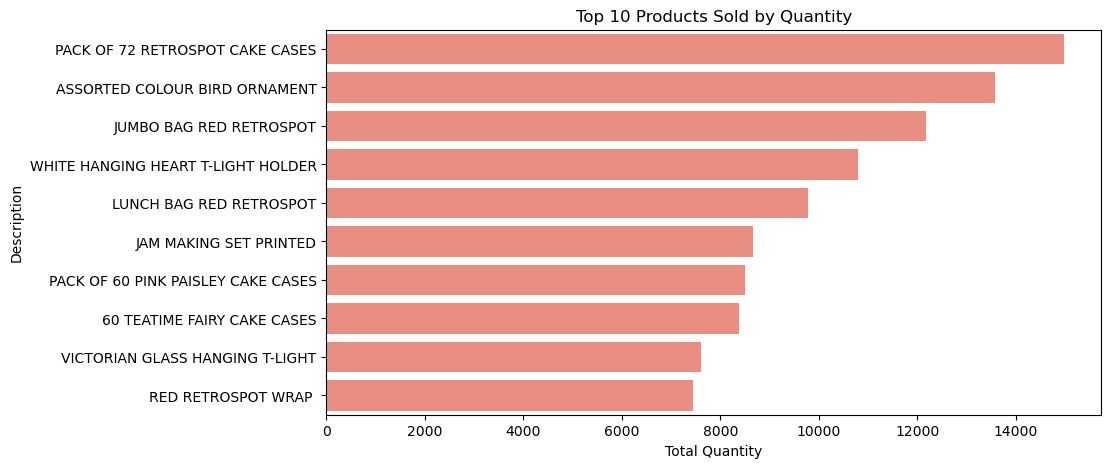

In [43]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, color='salmon')
plt.title('Top 10 Products Sold by Quantity')
plt.xlabel('Total Quantity')
plt.show()

#### 8.2. Sales by Country

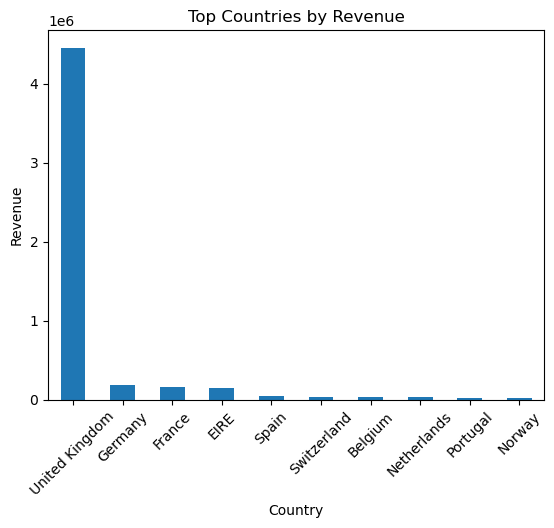

In [45]:
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
country_sales.plot(kind='bar', title='Top Countries by Revenue')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

#### 8.3. Sales Trend Over Time

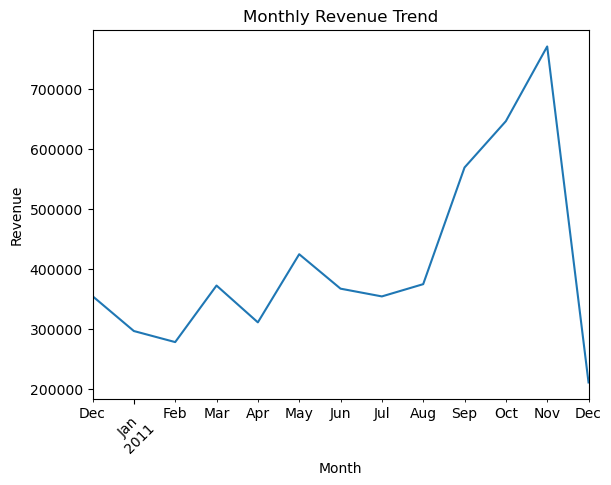

In [47]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['TotalPrice'].sum()
monthly_sales.plot(title='Monthly Revenue Trend')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

#### 8.4. Customer Spending Distribution

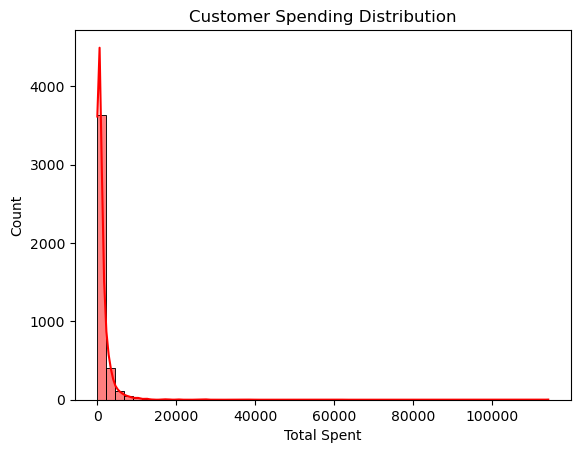

In [49]:
customer_sales = df.groupby('CustomerID')['TotalPrice'].sum()
sns.histplot(customer_sales, bins=50, kde=True, color='red')
plt.title("Customer Spending Distribution")
plt.xlabel("Total Spent")
plt.show()

#### 8.5. Average Order Value per Customer

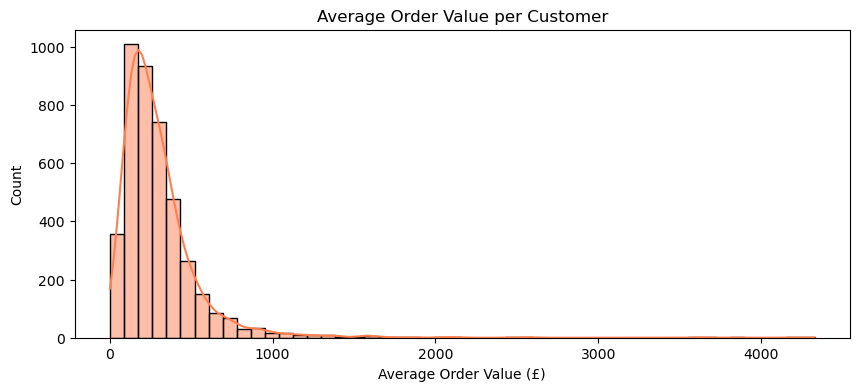

In [51]:
avg_order_value = df.groupby('CustomerID')['TotalPrice'].sum() / df.groupby('CustomerID')['InvoiceNo'].nunique()

plt.figure(figsize=(10, 4))
sns.histplot(avg_order_value, bins=50, kde=True, color='coral')
plt.title('Average Order Value per Customer')
plt.xlabel('Average Order Value (£)')
plt.show()

#### 8.6. Correlation Heatmap

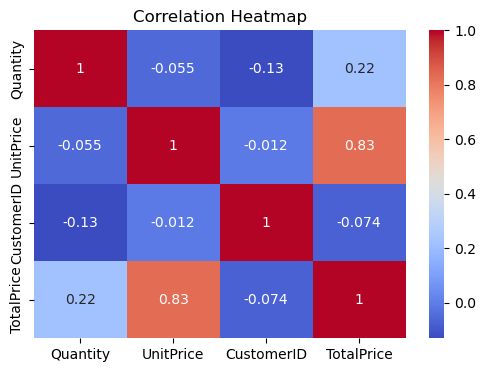

In [53]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Quantity', 'UnitPrice', 'CustomerID', 'TotalPrice']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### 8.7. Hour of the Day Analysis

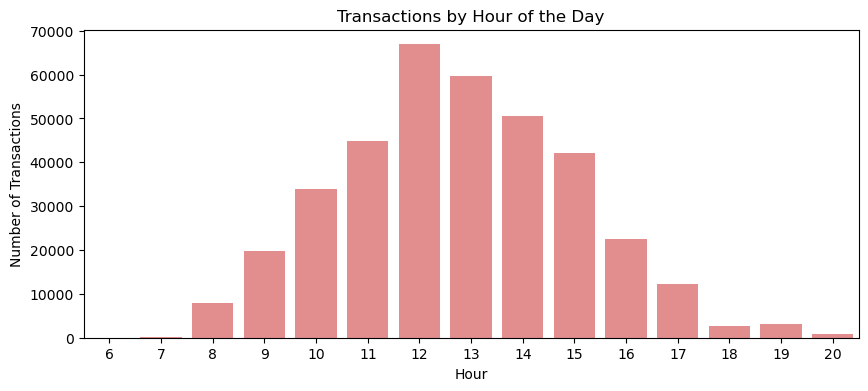

In [55]:
df['Hour'] = df['InvoiceDate'].dt.hour

plt.figure(figsize=(10, 4))
sns.countplot(x='Hour', data=df, color='lightcoral')
plt.title('Transactions by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.show()

#### 9. Preparing for model

In [67]:
# Final data set for model building
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Hour,Purchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,8,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,8,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,8,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,8,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,8,1


In [96]:
# Finalizing dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [124]:
# Drop irrelevant columns
df_clean = df.drop(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate'], axis=1)

In [126]:
# One-Hot Encode 'Country'
df_clean = pd.get_dummies(df_clean, columns=['Country'], drop_first=True)

In [128]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367076 entries, 0 to 541908
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype    
---  ------                        --------------   -----    
 0   Quantity                      367076 non-null  int64    
 1   UnitPrice                     367076 non-null  float64  
 2   CustomerID                    367076 non-null  float64  
 3   TotalPrice                    367076 non-null  float64  
 4   Month                         367076 non-null  period[M]
 5   Hour                          367076 non-null  int32    
 6   Purchase                      367076 non-null  int64    
 7   Country_Austria               367076 non-null  bool     
 8   Country_Bahrain               367076 non-null  bool     
 9   Country_Belgium               367076 non-null  bool     
 10  Country_Brazil                367076 non-null  bool     
 11  Country_Canada                367076 non-null  bool     
 12  Country_Channel Islan

In [130]:
# Month is not in numeric datatype

df_clean['InvoiceYear'] = df_clean['Month'].dt.year
df_clean['InvoiceMonth'] = df_clean['Month'].dt.month

# Drop month columns
df_clean = df_clean.drop(['Month'], axis=1)

In [132]:
# Define Features (X) and Target (y)
X = df_clean.drop('Purchase', axis=1)
y = df_clean['Purchase']

In [134]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [136]:
# Feature Scaling (for numeric)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 10. Model Building

#### 10.1 Logistic Regression

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier()
}


In [158]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}

results = []

for name, model in models.items():
    if name in ["Logistic Regression", "SVM", "k-NN"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

In [160]:
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
results_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,1.0,1.0,1.0,1.0
1,Random Forest,1.0,1.0,1.0,1.0


In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1